# Task 1-Data Preparation and Customer Analytics
Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

## Background information for the task

We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.

Main goals of this task are :

- Examine transaction data - check for missing data, anomalies, outliers and clean them
- Examine customer data - similar to above transaction data
- Data analysis and customer segments - create charts and graphs, note trends and insights
- Deep dive into customer segments - determine which segments should be targetted

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tran_data = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
tran_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
tran_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [5]:
pur_bvr = pd.read_csv("QVI_purchase_behaviour.csv")

In [6]:
pur_bvr.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [7]:
pur_bvr.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [8]:
tran_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [9]:
pur_bvr.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

## Checking and Removing Outliers

In [10]:
merged_data = pd.merge(pur_bvr, tran_data, on = 'LYLTY_CARD_NBR', how = 'right')
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,43599,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1343,MIDAGE SINGLES/COUPLES,Budget,43605,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2373,MIDAGE SINGLES/COUPLES,Budget,43329,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2426,MIDAGE SINGLES/COUPLES,Budget,43330,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [11]:
print(len(merged_data))
print(len(tran_data))

264836
264836


In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


### Date column should be data time format

In [13]:
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'], unit='D', origin='1899-12-30')

In [14]:
merged_data['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

### Checking the product name column to make sure all items are chips

In [15]:
merged_data["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [16]:
split_prods = merged_data["PROD_NAME"].str.replace(r'([0-9]+[gG])','', regex=True).str.replace(r'[^\w]',' ', regex=True).str.split()

In [17]:
word_counts = {}
def count_words(line):
  for word in line:
    if word not in word_counts:
      word_counts[word] = 1
    else:
      word_counts[word] += 1
split_prods.apply(lambda line: count_words(line))
print(pd.Series(word_counts).sort_values(ascending = False))

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
            ...  
Sunbites     1432
Pc           1431
Garden       1419
NCC          1419
Fries        1418
Length: 198, dtype: int64


There are Salsa products too in the data, We need to analyze data for chips only So, Removing the salsa products

In [18]:
indexAge = merged_data[(merged_data['PROD_NAME'].str.contains('Salsa'))].index
merged_data.drop(indexAge , inplace=True)

In [19]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    246742 non-null  int64         
 1   LIFESTAGE         246742 non-null  object        
 2   PREMIUM_CUSTOMER  246742 non-null  object        
 3   DATE              246742 non-null  datetime64[ns]
 4   STORE_NBR         246742 non-null  int64         
 5   TXN_ID            246742 non-null  int64         
 6   PROD_NBR          246742 non-null  int64         
 7   PROD_NAME         246742 non-null  object        
 8   PROD_QTY          246742 non-null  int64         
 9   TOT_SALES         246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.7+ MB


### Checking the product Quantity column for any outliers

In [20]:
merged_data["PROD_QTY"].describe()

count    246742.000000
mean          1.908062
std           0.659831
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [21]:
merged_data.sort_values(by="PROD_QTY", ascending=False).head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69763,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
69762,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
135225,46296,RETIREES,Budget,2019-05-15,46,42138,81,Pringles Original Crisps 134g,5,18.5
69523,71142,OLDER FAMILIES,Premium,2019-05-15,71,69852,96,WW Original Stacked Chips 160g,5,9.5
69502,55144,OLDER FAMILIES,Premium,2018-08-18,55,49328,44,Thins Chips Light& Tangy 175g,5,16.5


Two outliers of value 200 in PROD_QTY will be removed. Both entries are by the same customer and will be examined by this customer's transactions

In [22]:
indexAge = merged_data[(merged_data['PROD_QTY'] == 200)].index
merged_data.drop(indexAge , inplace=True)

### Checking Date Column Now

In [23]:
merged_data["DATE"].describe()

C:\Users\Mirza\AppData\Local\Temp\ipykernel_9340\3598048537.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_data["DATE"].describe()


count                  246740
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

- There are 365 days in a year but in the DATE column there are only 364 unique values so one is missing

In [24]:
pd.date_range(start=merged_data["DATE"].min(), end=merged_data["DATE"].max()).difference(merged_data["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

- Using the difference method we see that 2018-12-25 was a missing date

In [25]:
check_null_date = pd.merge(pd.Series(pd.date_range(start=merged_data["DATE"].min(), end = merged_data["DATE"].max()), name="DATE"), merged_data, on = "DATE", how = "left")

C:\Users\Mirza\AppData\Local\Temp\ipykernel_9340\3338362590.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()


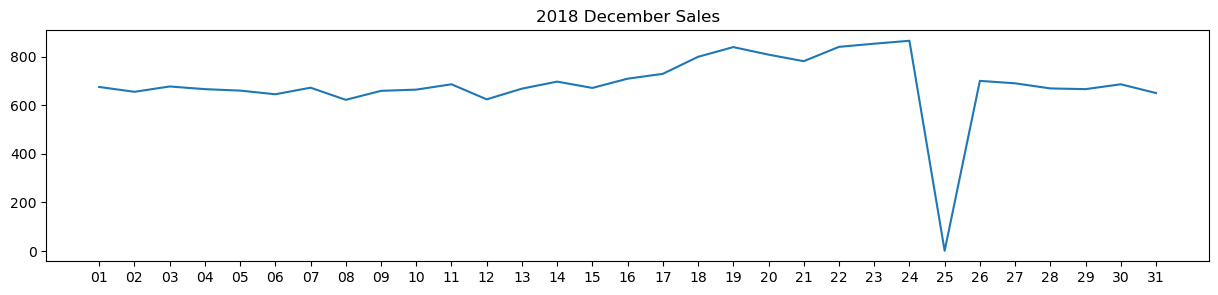

In [26]:
trans_by_date = check_null_date["DATE"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("2018 December Sales")
plt.savefig("2018 December Sales.png", bbox_inches="tight")
plt.show()

In [27]:
check_null_date["DATE"].value_counts().sort_values().head()

2018-12-25      1
2019-06-13    607
2018-09-22    609
2018-11-25    610
2018-10-18    611
Name: DATE, dtype: int64

- The day with no transaction is a Christmas day that is when the store is closed. So there is no anomaly in this.

### Explore Packet sizes

In [28]:
merged_data["PROD_NAME"] = merged_data["PROD_NAME"].str.replace(r'[0-9]+(G)','g' , regex = True)
pack_sizes = merged_data["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","" , regex=True).astype("float")
pack_sizes.describe()

count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64

<Axes: ylabel='Frequency'>

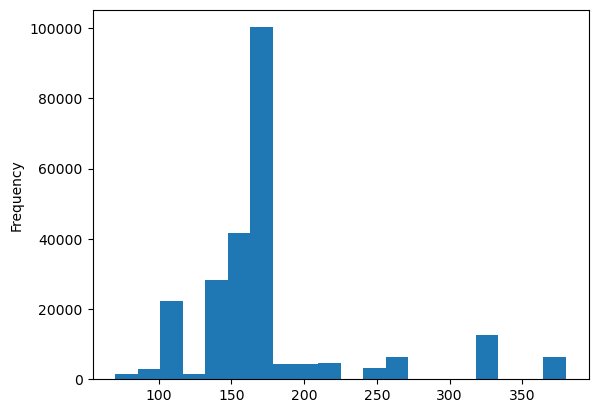

In [42]:
pack_sizes.plot.hist(bins=len(pack_sizes.value_counts()))

### Explore Brand Name

In [30]:
merged_data['BRAND_NAME'] = merged_data['PROD_NAME'].str.split().str[0]

In [31]:
merged_data["BRAND_NAME"].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27390
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: BRAND_NAME, dtype: int64

- Some product names are written in more than one way. Example : Dorito and Doritos, Grains and GrnWves, Infusions and Ifzns, Natural and NCC, Red and RRD, Smith and Smiths and Snbts and Sunbites.

In [35]:
def clean_brand_names(line):
    brand = line["BRAND_NAME"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

In [37]:
merged_data["BRAND_NAME"] = merged_data.apply(lambda line: clean_brand_names(line), axis=1)

In [38]:
merged_data["BRAND_NAME"].value_counts().sort_index()

Burger              1564
CCs                 4551
Cheetos             2927
Cheezels            4603
Cobs                9693
Doritos            25224
French              1418
Grain Waves         7740
Infuzions          14201
Kettle             41288
Natural Chip Co     7469
Pringles           25102
RRD                16321
Smiths             30353
Sunbites            3008
Thins              14075
Tostitos            9471
Twisties            9454
Tyrrells            6442
Woolworths         11836
Name: BRAND_NAME, dtype: int64

<Axes: >

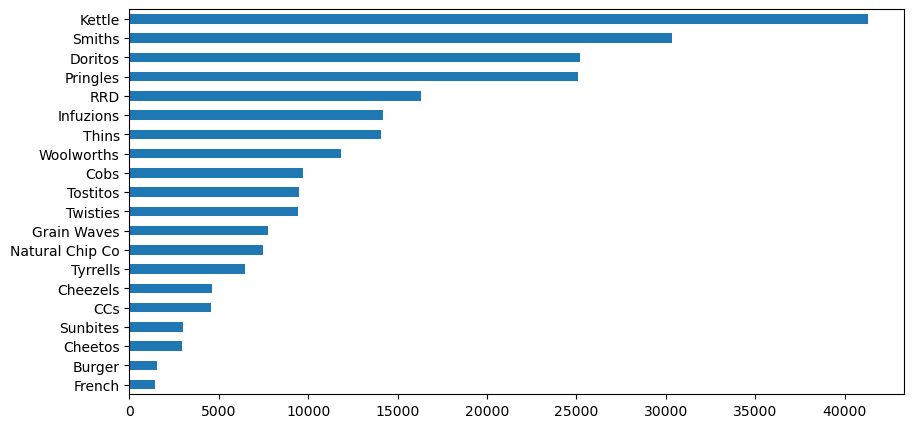

In [43]:
merged_data["Cleaned_Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(10,5))